In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt

import scipy
from scipy import stats
from statsmodels.stats.proportion import proportions_ztest

import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [258]:
# 한글 폰트 설정
# !ls -l /usr/share/fonts/truetype/
!rm -rf ~/.cache/matplotlib/*
!fc-cache -fv

# import matplotlib    
# import matplotlib.font_manager

# [f.name for f in matplotlib.font_manager.fontManager.ttflist if 'Nanum' in f.name]

/usr/share/fonts: caching, new cache contents: 0 fonts, 6 dirs
/usr/share/fonts/X11: caching, new cache contents: 0 fonts, 4 dirs
/usr/share/fonts/X11/Type1: caching, new cache contents: 8 fonts, 0 dirs
/usr/share/fonts/X11/encodings: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/X11/encodings/large: caching, new cache contents: 0 fonts, 0 dirs
/usr/share/fonts/X11/misc: caching, new cache contents: 89 fonts, 0 dirs
/usr/share/fonts/X11/util: caching, new cache contents: 0 fonts, 0 dirs
/usr/share/fonts/cMap: caching, new cache contents: 0 fonts, 0 dirs
/usr/share/fonts/cmap: caching, new cache contents: 0 fonts, 5 dirs
/usr/share/fonts/cmap/adobe-cns1: caching, new cache contents: 0 fonts, 0 dirs
/usr/share/fonts/cmap/adobe-gb1: caching, new cache contents: 0 fonts, 0 dirs
/usr/share/fonts/cmap/adobe-japan1: caching, new cache contents: 0 fonts, 0 dirs
/usr/share/fonts/cmap/adobe-japan2: caching, new cache contents: 0 fonts, 0 dirs
/usr/share/fonts/cmap/adobe-korea1: c

fc-cache: succeeded


In [157]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

# 유니코드 깨짐현상 해결
mpl.rcParams['axes.unicode_minus'] = False

# 나눔고딕 폰트 전체 적용
plt.rcParams["font.family"] = 'NanumMyeongjo'

## 실습과제 1 : 정규성 검정

In [272]:
df_sample = pd.read_csv('/home/piai/Bigdata 실습과제/1 Big Data 분석 기초/2sample_t_test.csv', encoding = 'euc-kr')
df_sample.tail()

,Mat_A,Mat_B,Total,Sub
15,NaN,NaN,72.7,2
16,NaN,NaN,66.9,2
17,NaN,NaN,70.2,2
18,NaN,NaN,74.4,2
19,NaN,NaN,70.1,2


In [276]:
df_sample.isnull().sum()

Mat_A    10
Mat_B    10
Total     0
Sub       0
dtype: int64

### 결측값 처리(1) : 평균으로 대체

In [6]:
mean_A = df_sample["Mat_A"].mean()
mean_B = df_sample["Mat_B"].mean()
df_sample["Mat_A"].fillna(mean_A , inplace = True)
df_sample["Mat_B"].fillna(mean_B , inplace = True)
df_sample.tail()

,Mat_A,Mat_B,Total,Sub
15,74.81,71.08,72.7,2
16,74.81,71.08,66.9,2
17,74.81,71.08,70.2,2
18,74.81,71.08,74.4,2
19,74.81,71.08,70.1,2


In [7]:
data1 = df_sample["Mat_A"]
data2 = df_sample["Mat_B"]
data3 = df_sample["Total"]

In [8]:
# 정규성 검정
shatistic1, p1 = stats.shapiro(data1)
shatistic2, p2 = stats.shapiro(data2)
shatistic3, p3 = stats.shapiro(data3)

In [9]:
print("Mat_A의 정규성 검정결과, Shapiro-Wilk Test : statistic={0}, p-value={1}".format(shatistic1, p1))

Mat_A의 정규성 검정결과, Shapiro-Wilk Test : statistic=0.89227294921875, p-value=0.029614390805363655


+ 정규성 검정결과(95% 신뢰수준 사용) P값이 0.05보다 낮기에, 해당 데이터는 정규성을 충족한다는 귀무가설을 기각 가능하다.

In [10]:
print("Mat_B의 정규성 검정결과, Shapiro-Wilk Test : statistic={0}, p-value={1}".format(shatistic2, p2))

Mat_B의 정규성 검정결과, Shapiro-Wilk Test : statistic=0.8450576066970825, p-value=0.004409835673868656


+ 정규성 검정결과(95% 신뢰수준 사용) P값이 0.05보다 낮기에, 해당 데이터는 정규성을 충족한다는 귀무가설을 기각 가능하다.

### 결측값 처리(2) : 제거

In [11]:
df_sample = pd.read_csv('/home/piai/Bigdata 실습과제/1 Big Data 분석 기초/2sample_t_test.csv', encoding = 'euc-kr')
df_sample.tail()

,Mat_A,Mat_B,Total,Sub
15,NaN,NaN,72.7,2
16,NaN,NaN,66.9,2
17,NaN,NaN,70.2,2
18,NaN,NaN,74.4,2
19,NaN,NaN,70.1,2


In [12]:
df_sample.dropna(0 , inplace = True)
df_sample.tail()

,Mat_A,Mat_B,Total,Sub
5,71.5,72.7,71.5,1
6,74.5,66.9,74.5,1
7,77.5,70.2,77.5,1
8,76.4,74.4,76.4,1
9,77.7,70.1,77.7,1


In [13]:
data1 = df_sample["Mat_A"]
data2 = df_sample["Mat_B"]
data3 = df_sample["Total"]

In [14]:
# 정규성 검정
shatistic1, p1 = stats.shapiro(data1)
shatistic2, p2 = stats.shapiro(data2)
shatistic3, p3 = stats.shapiro(data3)

In [15]:
print("Mat_A의 정규성 검정결과, Shapiro-Wilk Test : statistic={0}, p-value={1}".format(shatistic1, p1))

Mat_A의 정규성 검정결과, Shapiro-Wilk Test : statistic=0.906264066696167, p-value=0.2563020884990692


+ 정규성 검정결과(95% 신뢰수준 사용) P값이 0.05보다 높기 때문에, 해당 데이터는 정규성을 충족한다는 귀무가설을 기각하지 못한다.

In [16]:
print("Mat_B의 정규성 검정결과, Shapiro-Wilk Test : statistic={0}, p-value={1}".format(shatistic2, p2))

Mat_B의 정규성 검정결과, Shapiro-Wilk Test : statistic=0.9729753732681274, p-value=0.9169775247573853


+ 정규성 검정결과(95% 신뢰수준 사용) P값이 0.05보다 높기 때문에, 해당 데이터는 정규성을 충족한다는 귀무가설을 기각하지 못한다.

### 결론

> 결측값으로 제거할 경우 귀무가설이 타당하다.  
> 그러나 데이터의 수가 너무 적기 때문에 가설의 검정 과정에서 유의미한 결과를 얻지 못할 것으로 판단된다.  
> 따라서 결측값을 평균으로 처리하여 데이터의 수가 충분한 상태에서 통계적 추론을 실시할 것으로 결정하였다.

## 실습과제 2 : 모평균 구간 추정

In [277]:
dic = {'sample' : [18,18,20,21,20,23,19,18,17,21,22,20,20,21,20,19,19,18,17,19]}
df = pd.DataFrame(dic)
lower, upper = stats.norm.interval(0.95, loc = np.mean(df), scale = 3.8/np.sqrt(20))
print("신뢰구간 : {0}, {1}".format(lower.round(2), upper.round(2)))

신뢰구간 : [17.83], [21.17]


### 결론 

> 감자의 품종 개발이 성공했다고 판단할 수 있는 척도로 신뢰구간을 계산하였다.    
> 약 18 ~ 21 사이의 감자 Box들이 품종 개발이 성공한 Box로 에상할 수 있다.

## 실습과제 3 : 모평균 구간 추정(모표준편차를 모르는 경우)

In [18]:
dic = {'sample' : [73,71,74,69,70,73,70,68,75,72,70,72,73,70,70,72,71,70,75,72]}
df = pd.DataFrame(dic)
lower, upper = stats.t.interval(0.95, len(df)-1, loc = np.mean(df), scale = scipy.stats.sem(df))
print("신뢰구간 : {0}, {1}".format(lower.round(2), upper.round(2)))

신뢰구간 : [70.6], [72.4]


### 결론

 > 새로 개발된 강종의 평균 인장강도를 70Kg/mm^2으로 기대하고 있다.  
 표본의 신뢰구간 안에 기대치가 포함되어 있기 때문에 개발이 성공하였다고 예측할 수 있다.

## 실습과제 4 : 평균 검정 : 1 Sample t-test

In [27]:
u_before = 76.7
dic_after = {"sample" : [76.7,81.2,73.8,82.0,76.3,75.7,80.2,76.7,77.9,82.8]}
df_after = pd.DataFrame(dic)

statistic, p = stats.shapiro(df['sample'])
print("statistic={}, p-value={}".format(statistic,p))

t_result = stats.ttest_1samp(df,u_before)
t, p = t_result.statistic.round(3), t_result.pvalue.round(10)

print("1-Sample t-test")
print("t 통계량 : {}".format(t))
print("p-value : {}".format(p))

statistic=0.9470749497413635, p-value=0.32486021518707275
1-Sample t-test
t 통계량 : [-12.03]
p-value : [2.e-10]


In [39]:
u_before = 78.0
dic_after = {"sample" : [85.0,79.0,79.1,79.9,81.6,78.6,85.4,83.4,78.1,79.2]}
df_after = pd.DataFrame(dic)

<AxesSubplot:>

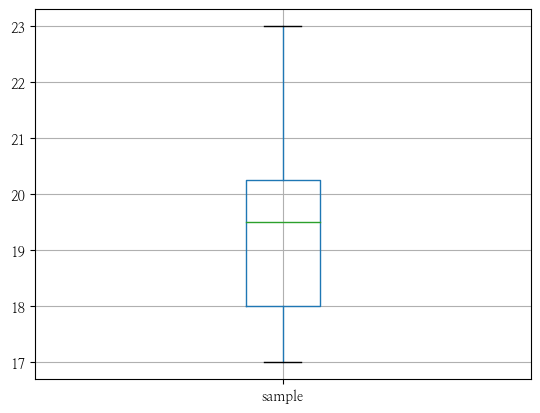

In [281]:
df.boxplot(["sample"])

+ 이상치는 식별하지 못하였다.

In [29]:
statistic, p = stats.shapiro(df['sample'])
print("statistic={}, p-value={}".format(statistic,p))

statistic=0.9470749497413635, p-value=0.32486021518707275


In [30]:
t_result = stats.ttest_1samp(df,u_before)
t, p = t_result.statistic.round(3), t_result.pvalue.round(3)

In [31]:
print("1-Sample t-test")
print("t 통계량 : {}".format(t))
print("p-value : {}".format(p))

1-Sample t-test
t 통계량 : [-15.038]
p-value : [0.]


+ 유의 수준 5%에서 검정결과 P값이 매우 작기 때문에 개선활동이 고객만족도를 변화시켰다고 할 수 있다.

## 실습과제 5 : 2 Sample t-test

In [283]:
dic_supply = {"sample_A" : [1.883, 1.715, 1.799, 1.768, 1.711, 1.832, 1.427, 1.344],
      "sample_B" : [1.435, 1.572, 1.486, 1.511, 1.457, 1.548, 1.404, 1.883]}
df_supply = pd.DataFrame(dic_supply)

#### 이상치 확인

<AxesSubplot:>

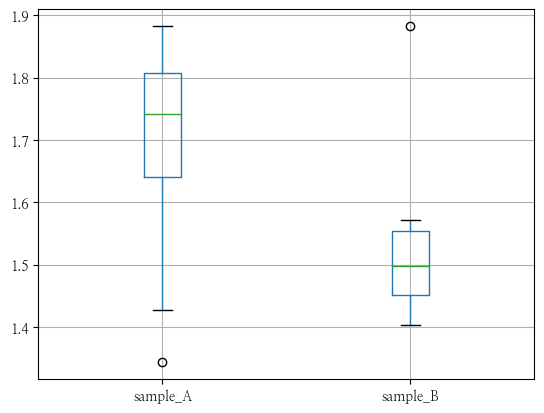

In [284]:
df_supply.boxplot(["sample_A","sample_B"])

> Boxplot의 IQR(사분위 범위)를 근거로 이상치의 포함 여부를 확인하였다.  
> Sample A의 최소값이 IQR 외부에 존재하여 이상치로 판단하였다.  
> Sample B의 최대값이 IQR 외부에 존재하여 이상치로 판단하였다.

#### 이상치 제거

> 해당 이상치는 정규분포성을 저해하는 요소이므로 Sample이 정규분포를 나타낼 수 있도록 제거 하였다.

In [285]:
df_A = df_supply["sample_A"].sort_index(ascending = False)
df_supply["sample_B"].sort_index()
df_A.drop(7, inplace = True)

#### 정규성 검정 및 등분산 검정

In [48]:
# 정규성 검정
statistic_A, p_A = stats.shapiro(df_supply['sample_A'])
print("statistic : {}, p-value : {}".format(statistic_A, p_A))

statistic : 0.836285412311554, p-value : 0.09172070026397705


> sample A는 대략적으로 정규분포를 따른다고 할 수 있다.

In [49]:
statistic_B, p_B = stats.shapiro(df_supply['sample_B'])
print("statistic : {}, p-value : {}".format(statistic_B, p_B))

statistic : 0.9755363464355469, p-value : 0.9352017641067505


> sample B는 대략적으로 정규분포를 따른다고 할 수 있다.

In [50]:
# 등분산 검정
stats.bartlett(df_supply['sample_A'],df_supply['sample_B'])

BartlettResult(statistic=3.960394902992892, pvalue=0.04658277397613468)

In [51]:
# 두 집단의 평균 비교
t_result = stats.ttest_ind(df_supply['sample_A'],df_supply['sample_B'])
t, p = t_result.statistic.round(3), t_result.pvalue.round(3)

In [52]:
print("2-Sampel test")
print("t : {}".format(t))
print("p : {}".format(p))

2-Sampel test
t : 4.058
p : 0.002


### 결론

> 유의수준 5%에서 검정결과 P값이 0.002이므로 공급자간에 제품의 차이가 있다고 할 수 있다.

#### 차이가 있다면 어떤 방법이 더 효과적인가?


> A공급자의 제품의 두께가 평균적으로 더 두껍게 측정되었다.  
> 따라서 두꺼운 제품을 필요로 할 경우, A공급자에게서 제품을 공급받아야 할 것이다.

## 실습 과제 6 : Paired t-test

In [288]:
# Data set
df_before = pd.DataFrame({"before" : [720,589,780,648,720,589,780,648,780,648]})
df_after = pd.DataFrame({"after" : [710,580,787,712,750,600,782,670,790,680]})

#### Paired t-test

In [287]:
# Paired t-test
t_result = stats.ttest_rel(df_before, df_after)
# t, p 
t, p = t_result.statistic.round(5), t_result.pvalue.round(5)
print("Paired test")
print("t : {}".format(t))
print("p : {}".format(p))

Paired test
t : [-2.26607]
p : [0.04968]


### 결론

> 유의수준 5% 차이에서 검정결과 P값이 0.4968 이므로 학원 수강 전후의 점수는 차이가 거의 없다고 할 수 있다.

> 점수의 차이가 없다면, 그 이유를 찾아야 한다.  
    - 학원 강사의 능력이 낮을 수가 있다.  
    - 학생의 집중도가 낮을 수가 있다.

## 실습 과제 7 : 1 Proportion test

#### 가설의 수립
* H_0 : p = 0.5
* H_1 : p != 0.5
* p = 40/60

#### Proportion test

In [54]:
# 변수의 선언
count_head = 40
n_obs = 100
value = 0.5
# test 
stat, pval = proportions_ztest(count_head, n_obs, value)

In [55]:
# 결과 출력
print("1 Proportion test")
print("z: {0:0.3f}".format(stat))
print("p: {0:0.3f}".format(pval))

1 Proportion test
z: -2.041
p: 0.041


### 결론

> 유의수준 5%에서 검정결과 P값이 0.041 이므로 동전은 정상적이지 않다고 할 수 있다.  
> 해당 동전은 앞면 보다 뒷면이 더 많이 나올 가능성이 높다.

## 실습 과제 8 : 2 Proportion test

#### 가설의 수립
* H0 : p1 = p2
* H1 : p1 != p2
* p1_hat = 14 / 1200
* p2_hat = 5 / 1200

#### Proportion test

In [56]:
# 변수 선언
count = np.array([14,5])
nobs = np.array([1200,1200])

In [57]:
# test
stat, pval = proportions_ztest(count, nobs)

In [58]:
print("2 Proportion test")
print("z: {0:0.3f}".format(stat))
print("p: {0:0.3f}".format(pval))

2 Proportion test
z: 2.073
p: 0.038


### 결론

> 유의수준 5%에서 검정결과 P값이 0.038 이므로 두 공정의 불량률은 같다고 할 수 없다.  
> 불량률이 적은 우수한 제품을 생산하는 공정은 B라고 판단할 수 있다.

## 실습 과제 9 : 카이제곱 검정

In [85]:
index = ['A/S', '가격', '성능', '확장성', '디자인', '안정성', '기능성']
dic = {'A' : [18,1,8,7,10,9,10], 'B' : [8,2,14,5,5,9,4], 'C' : [4,1,3,4,9,5,4], 
       'D' : [4,1,2,3,2,7,3], 'E' : [3,1,3,1,1,1,1], 'F' : [3,25,8,10,2,1,7]}
df_notebook = pd.DataFrame(dic, index = index)
df_notebook

,A,B,C,D,E,F
A/S,18,8,4,4,3,3
가격,1,2,1,1,1,25
성능,8,14,3,2,3,8
확장성,7,5,4,3,1,10
디자인,10,5,9,2,1,2
안정성,9,9,5,7,1,1
기능성,10,4,4,3,1,7


#### 카이제곱 검정

In [87]:
# chi-square test
chi, pval, dof, expected = stats.chi2_contingency(df_notebook)

In [93]:
# Print
print("# chi-square test")
print("chisq : {0:0.3f}".format(chi))
print("p-value : {0:0.10f}".format(pval))
print("degree pf freedom : {0:0.3f}".format(dof))
print("expected value: \n{}".format(expected.round(3)))

# chi-square test
chisq : 98.274
p-value : 0.0000000035
degree pf freedom : 30.000
expected value: 
[[11.004  8.21   5.24   3.843  1.921  9.782]
 [ 8.528  6.362  4.061  2.978  1.489  7.581]
 [10.454  7.799  4.978  3.651  1.825  9.293]
 [ 8.253  6.157  3.93   2.882  1.441  7.336]
 [ 7.978  5.952  3.799  2.786  1.393  7.092]
 [ 8.803  6.568  4.192  3.074  1.537  7.825]
 [ 7.978  5.952  3.799  2.786  1.393  7.092]]


### 결론

> 유의수준 5%에서 검정결과 P값이 0.0000000035 이므로 제품별로 이미지 차이가 없다고 할 수 있다.

#### 이미지 차이가 없다면 어떤 제품이 가장 좋은가?

In [266]:
df_Test = df_notebook.T
# df_Test.sort_values(by = "A/S")
# df_Test.sort_values(by = "가격")
# df_Test.sort_values(by = "성능")
# df_Test.sort_values(by = "확장성")
# df_Test.sort_values(by = "디자인")
# df_Test.sort_values(by = "안정성")
# df_Test.sort_values(by = "기능성")

|평가지표|가장 우수한 제품|
|:------|:---|
|A/S|A|
|가격|F|
|성능|B|
|확장성|F|
|디자인|A|
|안정성|A,B|
|기능성|A|

> 지표별 가장 우수한 제품을 선택한다면, A제품을 선택하는 것이 효율적이라고 할 수 있다.

## 실습 과제 10 : 카이제곱 검정 

In [267]:
df_ANOVA = pd.read_csv('/home/piai/Bigdata 실습과제/1 Big Data 분석 기초/ANOVA.csv', encoding = 'euc-kr')
df_ANOVA.isnull().sum()

time        0
charge      0
gangjong    0
type        0
dtype: int64

In [268]:
df_ANOVA.head()

,time,charge,gangjong,type
0,32.2,A,a,a
1,30.4,B,a,a
2,33.6,C,a,a
3,36.4,D,a,a
4,33.9,E,a,a


In [269]:
df_ANOVA.drop(['charge'], axis = 1, inplace=True)
df_ANOVA.head()

,time,gangjong,type
0,32.2,a,a
1,30.4,a,a
2,33.6,a,a
3,36.4,a,a
4,33.9,a,a


### 강종별 2차정련 시간의 차이가 있는 지 검정

In [234]:
a = df_ANOVA['time'][df_ANOVA['gangjong'] == 'a']
b = df_ANOVA['time'][df_ANOVA['gangjong'] == 'b'].reset_index(drop = True)
c = df_ANOVA['time'][df_ANOVA['gangjong'] == 'c'].reset_index(drop = True)
d = df_ANOVA['time'][df_ANOVA['gangjong'] == 'd'].reset_index(drop = True)

In [236]:
df_ANOVA_gangjong = pd.DataFrame({'a' : a, 'b' : b, 'c' : c, 'd' : d})
df_ANOVA_gangjong

,a,b,c,d
0,32.2,33.1,32.6,26.7
1,30.4,29.9,32.7,28.5
2,33.6,31.7,29.3,30.9
3,36.4,27.5,25.9,26.2
4,33.9,34.0,31.1,32.3
5,34.9,30.7,23.8,23.7


In [240]:
# 강종별 간 정규성 검정
statistic1, p1 = stats.shapiro(df_ANOVA_gangjong['a'])
statistic2, p2 = stats.shapiro(df_ANOVA_gangjong['b'])
statistic3, p3 = stats.shapiro(df_ANOVA_gangjong['c'])
statistic4, p4 = stats.shapiro(df_ANOVA_gangjong['d'])
print("statistic = {}, p-value : {}".format(statistic1, p1))
print("statistic = {}, p-value : {}".format(statistic2, p2))
print("statistic = {}, p-value : {}".format(statistic3, p3))
print("statistic = {}, p-value : {}".format(statistic4, p4))

statistic = 0.9879403114318848, p-value : 0.983557939529419
statistic = 0.9769707918167114, p-value : 0.9355478286743164
statistic = 0.8929420113563538, p-value : 0.3338908553123474
statistic = 0.9713904857635498, p-value : 0.901641845703125


> 강종별 2차정련 시간의 분포는 정규분포를 따른다고 할 수 있다.

In [242]:
# 등분산성 검정
stats.levene(df_ANOVA_gangjong['a'],df_ANOVA_gangjong['b'],df_ANOVA_gangjong['c'],df_ANOVA_gangjong['d'])

LeveneResult(statistic=0.9417495009041227, pvalue=0.4390899931524723)

> 유의수준 5%에서 검정결과 P값이 0.439 이므로 강종별 간 2차정련 시간의 차이는 없다고 할 수 있다.

### type별 2차정련 시간의 차이가 있는지 검정

In [253]:
a = df_ANOVA['time'][df_ANOVA['type'] == 'a']
b = df_ANOVA['time'][df_ANOVA['type'] == 'b'].reset_index(drop = True)

In [252]:
df_ANOVA_type = pd.DataFrame({'a' : a, 'b' : b})
df_ANOVA_type.head()

,a,b
0,32.2,32.6
1,30.4,32.7
2,33.6,29.3
3,36.4,25.9
4,33.9,31.1


In [254]:
# type 간 정규성 검정
statistic1, p1 = stats.shapiro(df_ANOVA_type['a'])
statistic2, p2 = stats.shapiro(df_ANOVA_type['b'])
print("statistic = {}, p-value : {}".format(statistic1, p1))
print("statistic = {}, p-value : {}".format(statistic2, p2))

statistic = 0.982139527797699, p-value : 0.9907686114311218
statistic = 0.9098271131515503, p-value : 0.2122616022825241


> type별 2차정련 시간의 분포는 정규분포를 따른다고 할 수 있다.

In [256]:
# 등분산성 검정
stats.levene(df_ANOVA_type['a'],df_ANOVA_type['b'])

LeveneResult(statistic=2.1557191195451235, pvalue=0.1561933555382328)

> 유의수준 5%에서 검정결과 P값이 0.156 이므로 type별 간 2차정련 시간의 차이는 없다고 할 수 있다.

## 실습 과제 11 : 카이제곱 검정

In [243]:
# data 
df_strength = [37.6,38.6,37.2,36.4,38.6,39,37.2,36.1,35.9,37.1,36.9,37.5,36.3,38.1,39,36.9,36.8,37.6,33,33.5]
df_temperature = [14,15,14,16,17,14,17,16,15,16,14,16,18,13,15,17,14,16,20,21] 

In [244]:
# Correlation Analysis
corr, pval = stats.pearsonr(df_strength, df_temperature)
print("Correlation Analysis")
print("corr: {0:0.3f}".format(corr))
print("p-value: {0:0.3f}".format(pval))

Correlation Analysis
corr: -0.723
p-value: 0.000


### 결론

> 유의수준 5%에서 검정결과 P값이 매우 작기 때문에 부품수리시간과 부품수 사이에 "매우 강한 상관성"이 있다고 할 수 있다.

#### 그렇다면 상관관계는 어떻게 표현되는가?

In [155]:
df_strength.sort()
df_temperature.sort()

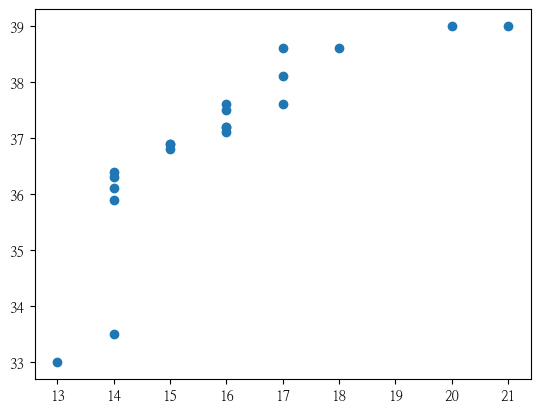

In [160]:
plt.scatter(df_temperature, df_strength)

#### 추정 결과

> 재료 반죽온도가 증가할수록 초코칩의 강도는 증가하지만, 온도가 높아질 수록 강도의 증가정도는 줄어들게 된다.  
> 상관관계는 곡선 형태의 회귀선으로 추정될 수 있다.